In [1]:
# %matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LightSource

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [3]:
n_qubits = 15
qubitstate_size = 2**n_qubits
# filename = "sqfuncs_dim" + str(D) + "_q" + str(n_qubits) + ".txt"
filename = "symtest.txt"
symQfunc = np.genfromtxt("C:/dev/StabilizerStates/data/symQfuncs/"+filename, usecols = 0, delimiter=",", dtype = float)
symQfunc = np.reshape(symQfunc,(n_qubits,n_qubits,n_qubits))

_x, _y, _z = np.arange(0,n_qubits,1), np.arange(0,n_qubits,1), np.arange(0,n_qubits,1)
_xx, _yy, __zz = np.meshgrid(_x, _y, _z, indexing="ij")
x, y, z = _xx.ravel(), _yy.ravel(), __zz.ravel()

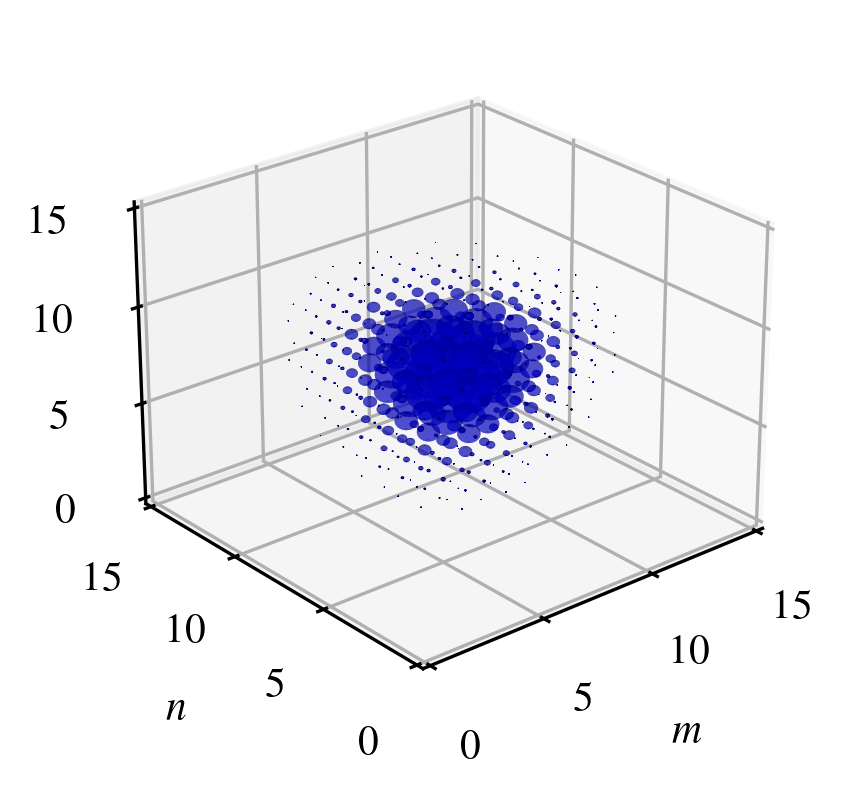

In [4]:
light = LightSource(0,20)
fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-130)
ax.set_xlabel(r'$m$')
ax.set_ylabel(r'$n$')
ax.set_xlim(0,n_qubits)
ax.set_ylim(0,n_qubits)
ax.set_zlim(0,n_qubits)
maxQ = np.max(symQfunc)

for (i,j,k) in zip(x,y,z):
    r = symQfunc[i,j,k] / maxQ
    if r > 0.01:
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        s_x = r*np.cos(u)*np.sin(v)
        s_y = r*np.sin(u)*np.sin(v)
        s_z = r*np.cos(v)

        ax.plot_surface(s_x+i, s_y+j, s_z+k, color = 'b', alpha=0.5)